In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import KFold,GridSearchCV,cross_val_score

from sklearn.metrics import mean_absolute_error,mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector

In [2]:
pd.options.display.max_columns= None

#plt.rcParams(figure.figsize) = (15,8)

In [3]:
#reading imput data:

df_train = pd.read_csv("beijing_train.csv")
df_train.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   REF_NO   403776 non-null  int64  
 1   year     403776 non-null  int64  
 2   month    403776 non-null  int64  
 3   day      403776 non-null  int64  
 4   hour     403776 non-null  int64  
 5   PM2.5    395301 non-null  float64
 6   PM10     397554 non-null  float64
 7   SO2      395000 non-null  float64
 8   NO2      391917 non-null  float64
 9   CO       383515 non-null  float64
 10  O3       390769 non-null  float64
 11  TEMP     403512 non-null  float64
 12  PRES     403511 non-null  float64
 13  DEWP     403507 non-null  float64
 14  RAIN     403515 non-null  float64
 15  wd       402387 non-null  object 
 16  WSPM     403538 non-null  float64
 17  station  403776 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.5+ MB


### NULLS ARE PRESENT IN FEW COLUMNS.
### DATATYPE OF YEAR,MONTH,DAY CAN BE CONVERTED TO OBJECT

In [5]:
df_test = pd.read_csv("beijing_test.csv")
df_test.head()

,REF_NO,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,33649,2017,1,1,0,496.0,8.0,121.0,6100.0,4.0,-4.7,1022.1,-6.1,0.0,ENE,1.0,Aotizhongxin
1,33650,2017,1,1,1,497.0,7.0,113.0,6300.0,4.0,-5.2,1022.3,-6.4,0.0,E,0.7,Aotizhongxin
2,33651,2017,1,1,2,469.0,7.0,111.0,6200.0,4.0,-5.4,1022.5,-6.5,0.0,ENE,1.1,Aotizhongxin
3,33652,2017,1,1,3,425.0,6.0,109.0,5900.0,3.0,-5.2,1022.5,-6.2,0.0,E,1.1,Aotizhongxin
4,33653,2017,1,1,4,468.0,10.0,123.0,7700.0,16.0,-5.0,1021.9,-5.8,0.0,ENE,1.0,Aotizhongxin


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16728 entries, 0 to 16727
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   REF_NO   16728 non-null  int64  
 1   year     16728 non-null  int64  
 2   month    16728 non-null  int64  
 3   day      16728 non-null  int64  
 4   hour     16728 non-null  int64  
 5   PM10     16728 non-null  float64
 6   SO2      16728 non-null  float64
 7   NO2      16728 non-null  float64
 8   CO       16728 non-null  float64
 9   O3       16728 non-null  float64
 10  TEMP     16728 non-null  float64
 11  PRES     16728 non-null  float64
 12  DEWP     16728 non-null  float64
 13  RAIN     16728 non-null  float64
 14  wd       16728 non-null  object 
 15  WSPM     16728 non-null  float64
 16  station  16728 non-null  object 
dtypes: float64(10), int64(5), object(2)
memory usage: 2.2+ MB


### NO NULLS IN TEST DATASET
### DATATYPE OF YEAR,MONTH,DAY,HOUR can be converted to OBJECT.

In [7]:
# Assigning correct datatype for columns: year,month,day from int64 to object

#train and test dataset


df_train['year'] = df_train['year'].astype(np.object)
df_train['month'] = df_train['month'].astype(np.object)
df_train['day'] = df_train['day'].astype(np.object)
df_train['hour'] = df_train['hour'].astype(np.object)

df_test['year'] = df_test['year'].astype(np.object)
df_test['month'] = df_test['month'].astype(np.object)
df_test['day'] = df_test['day'].astype(np.object)
df_test['hour'] = df_test['hour'].astype(np.object)

### 5 POINT SUMMARY OF TRAIN AND TEST DATA:

In [8]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
REF_NO,403776.0,16824.500000,9713.352953,1.0000,8412.75,16824.5,25236.25,33648.0
PM2.5,395301.0,79.248275,79.146708,2.0000,21.00,55.0,110.00,999.0
PM10,397554.0,104.327897,90.136400,2.0000,36.00,83.0,145.00,999.0
SO2,395000.0,15.733060,21.739455,0.2856,2.00,7.0,19.00,500.0
NO2,391917.0,50.352785,34.771910,1.0265,23.00,43.0,71.00,290.0
CO,383515.0,1214.843339,1124.285676,100.0000,500.00,900.0,1500.00,10000.0
O3,390769.0,58.119327,57.375966,0.2142,11.00,45.0,83.00,1071.0
TEMP,403512.0,14.088899,11.303534,-19.9000,4.00,15.4,23.50,41.6
PRES,403511.0,1010.282534,10.356778,982.4000,1002.00,1009.8,1018.30,1042.8
DEWP,403507.0,3.157291,13.617273,-43.4000,-8.00,4.2,15.50,29.1


In [9]:
df_train.describe(include= np.object).T

,count,unique,top,freq
year,403776,4,2016,105408
month,403776,12,12,35712
day,403776,31,16,13248
hour,403776,24,23,16824
wd,402387,16,NE,40049
station,403776,12,Guanyuan,33648


In [10]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
REF_NO,16728.0,34350.832676,406.651831,33649.000,33999.0,34349.0,34699.25,35064.0
PM10,16728.0,110.716643,123.370127,3.000,24.0,68.0,153.00,994.0
SO2,16728.0,18.130918,19.297973,1.000,5.0,12.0,25.00,300.0
NO2,16728.0,57.198290,41.855035,2.000,21.0,51.0,84.00,276.0
CO,16728.0,1584.660450,1740.982006,100.000,400.0,900.0,2100.00,10000.0
O3,16728.0,39.935198,31.398917,1.000,9.0,38.0,64.00,500.0
TEMP,16728.0,0.346082,4.706547,-13.425,-2.8,-0.2,2.90,16.2
PRES,16728.0,1021.839977,6.272443,997.100,1018.0,1022.0,1026.25,1037.6
DEWP,16728.0,-13.451417,6.377738,-31.700,-18.7,-13.0,-8.10,0.9
RAIN,16728.0,0.002469,0.035825,0.000,0.0,0.0,0.00,1.1


In [11]:
df_test.describe(include= np.object).T

,count,unique,top,freq
year,16728,1,2017,16728
month,16728,2,1,8886
day,16728,31,8,576
hour,16728,24,9,707
wd,16728,16,NE,3699
station,16728,12,Dingling,1407


#### TEST DATA CONTAINS DATA FROM YEAR 2017 ONLY. 

### NULL PROFILING:

In [12]:
#### CHECKING SKEW OF NUMERICAL COLUMNS: TRAIN DATASET

df_train_num = df_train.select_dtypes(np.number)
df_train_num.skew()

REF_NO     0.000000
PM2.5      1.974287
PM10       1.816482
SO2        3.007737
NO2        1.052701
CO         2.560662
O3         1.635164
TEMP      -0.168698
PRES       0.151948
DEWP      -0.250022
RAIN      29.440245
WSPM       1.625270
dtype: float64

### SKEW OF TRAIN DATASET
#### COLUMN : RAIN is very highly positively skewed.
#### COLUMN: SO2 AND CO are also positively skewed
#### COLUMN: PM2.5,PM10,NO2,O3,WSPM are moderately positively skewed.
#### COLUMN: TEMP and DEWPT are slightly negatively skewed.


<Figure size 1080x576 with 0 Axes>

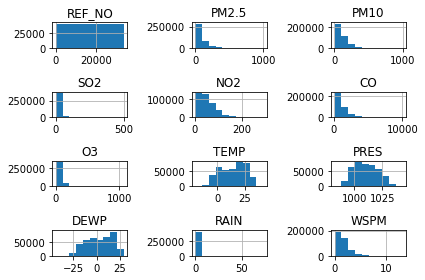

In [14]:
plt.figure(figsize = (15,8))
df_train_num.hist()
plt.tight_layout()

In [15]:
# Null profiling: COLUMWISE: TRAIN DATA

null = pd.concat([df_train.isnull().sum(),df_train.isnull().mean()*100],axis=1)
null.columns = ['Null count','NUll%']
null.sort_values(by = 'Null count')

,Null count,NUll%
REF_NO,0,0.000000
hour,0,0.000000
day,0,0.000000
station,0,0.000000
year,0,0.000000
month,0,0.000000
WSPM,238,0.058944
RAIN,261,0.064640
TEMP,264,0.065383
PRES,265,0.065630


In [17]:
# Row wise null profiling:
count = {}
for i in range(1,17):
    
    count[i] = len(df_train[df_train.isnull().sum(axis=1) == i].index)

print("No of rows with specified no.of nulls in it: ")
count

No of rows with specified no.of nulls in it: 


{1: 26583,
 2: 4524,
 3: 429,
 4: 814,
 5: 238,
 6: 4959,
 7: 24,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0}

In [18]:
#Null profiling the test dataset:
null_test = pd.concat([df_test.isnull().sum(),df_test.isnull().mean()*100],axis=1)
null_test.columns = ['Null count','NUll%']
null_test

,Null count,NUll%
REF_NO,0,0.0
year,0,0.0
month,0,0.0
day,0,0.0
hour,0,0.0
PM10,0,0.0
SO2,0,0.0
NO2,0,0.0
CO,0,0.0
O3,0,0.0


In [19]:
#Replacing nulls with corresponding median values:

for i in df_train_num.columns:
    df_train[i].fillna(df_train[i].median(),inplace=True)

In [20]:
df_train['wd'].fillna(df_train['wd'].mode()[0],inplace=True)


In [21]:
df_train.isnull().sum()

REF_NO     0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [22]:
df_test.isnull().sum()

REF_NO     0
year       0
month      0
day        0
hour       0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

### Test Dataset has no null values in it.

In [23]:
df_train_num = df_train.select_dtypes(include = np.number)
df_train_num.head()

,REF_NO,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4
1,2,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7
2,3,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6
3,4,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1
4,5,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0


In [24]:
df_train_cat = df_train.select_dtypes(include = np.object)
df_train_cat.head()

,year,month,day,hour,wd,station
0,2013,3,1,0,NNW,Aotizhongxin
1,2013,3,1,1,N,Aotizhongxin
2,2013,3,1,2,NNW,Aotizhongxin
3,2013,3,1,3,NW,Aotizhongxin
4,2013,3,1,4,N,Aotizhongxin


In [25]:
df_train.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [26]:
df_train.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'REF_NO'),
  Text(2, 0, 'PM2.5'),
  Text(3, 0, 'PM10'),
  Text(4, 0, 'SO2'),
  Text(5, 0, 'NO2'),
  Text(6, 0, 'CO'),
  Text(7, 0, 'O3'),
  Text(8, 0, 'TEMP'),
  Text(9, 0, 'PRES'),
  Text(10, 0, 'DEWP'),
  Text(11, 0, 'RAIN'),
  Text(12, 0, 'WSPM')])

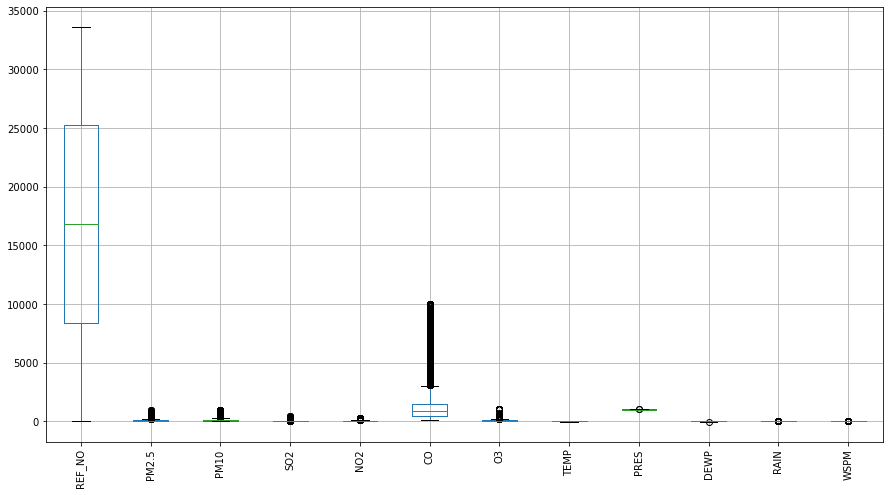

In [27]:
#### OUTLIERS CHECK:
plt.figure(figsize = (15,8))
df_train_num.boxplot()
plt.xticks(rotation=90)

In [28]:
q1 = df_train.quantile(0.25)

q3 = df_train.quantile(0.75)

iqr = q3-q1

upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)

df1 = df_train[((df_train > upper) | (df_train < lower)).any(axis=1)]

print("No of rows in outliers: ",df1.shape[0])

No of rows in outliers:  110056


In [29]:
#There are 1,08,366 rows belinging to outlier category.
#So we remove the outliers.
df_train = df_train[~((df_train > upper) | (df_train < lower)).any(axis=1)]
df_train.shape

(293720, 18)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(1, 0, 'REF_NO'),
  Text(2, 0, 'PM10'),
  Text(3, 0, 'SO2'),
  Text(4, 0, 'NO2'),
  Text(5, 0, 'CO'),
  Text(6, 0, 'O3'),
  Text(7, 0, 'TEMP'),
  Text(8, 0, 'PRES'),
  Text(9, 0, 'DEWP'),
  Text(10, 0, 'RAIN'),
  Text(11, 0, 'WSPM')])

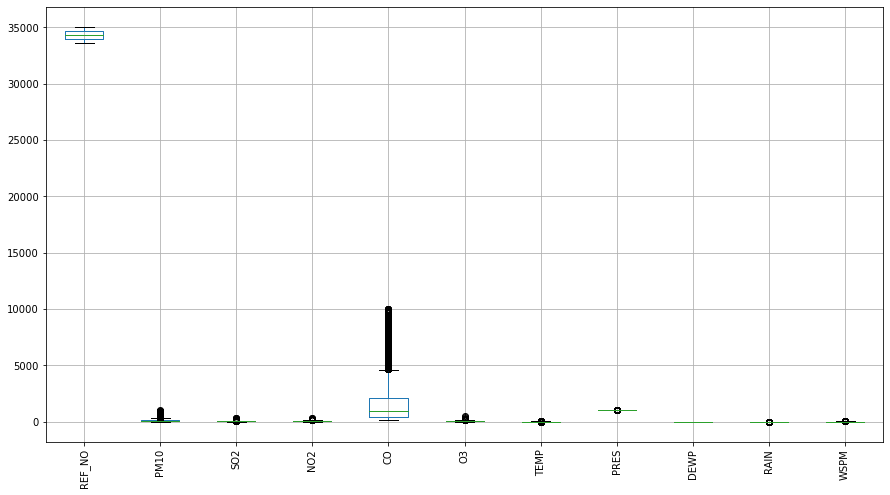

In [30]:
#### OUTLIERS IN TEST DATASET:

plt.figure(figsize = (15,8))
df_test.boxplot()
plt.xticks(rotation=90)

In [31]:
#Checking no. of rows in outliers category:

q1 = df_test.quantile(0.25)

q3 = df_test.quantile(0.75)

iqr = q3-q1

upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)

df1 = df_test[((df_test > upper) | (df_test < lower)).any(axis=1)]


print("No of rows in outliers: ",df1.shape[0])

No of rows in outliers:  3601


In [32]:
#There are 3601 rows belonging to outlier category.So we remove the outliers.

df_test = df_test[~((df_test > upper) | (df_test < lower)).any(axis=1)]
df_test.shape

(13127, 17)

In [33]:
#### Encoding cateogorical variables:

df1_cat = df_train.select_dtypes(include = np.object)
df1_cat.head()

,year,month,day,hour,wd,station
3,2013,3,1,3,NW,Aotizhongxin
4,2013,3,1,4,N,Aotizhongxin
5,2013,3,1,5,N,Aotizhongxin
6,2013,3,1,6,NNE,Aotizhongxin
7,2013,3,1,7,NNW,Aotizhongxin


In [34]:
for i in df1_cat.columns:
    print(i,df1_cat[i].unique())

year [2013 2014 2015 2016]
month [3 4 5 6 7 8 9 10 11 12 1 2]
day [1 2 3 4 8 9 10 11 12 13 14 15 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 5 6 7 16]
hour [3 4 5 6 7 8 9 10 11 15 16 17 18 19 20 21 22 23 0 1 2 12 13 14]
wd ['NW' 'N' 'NNE' 'NNW' 'ENE' 'E' 'NE' 'W' 'SSW' 'WSW' 'SE' 'WNW' 'SSE' 'S'
 'SW' 'ESE']
station ['Aotizhongxin' 'Changping' 'Dingling' 'Dongsi' 'Guanyuan' 'Gucheng'
 'Huairou' 'Nongzhanguan' 'Shunyi' 'Tiantan' 'Wanliu' 'Wanshouxigong']


In [35]:
df1_cat_encode = pd.get_dummies(df1_cat,drop_first= True)

df1_cat_encode.head()

,year_2014,year_2015,year_2016,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW,station_Changping,station_Dingling,station_Dongsi,station_Guanyuan,station_Gucheng,station_Huairou,station_Nongzhanguan,station_Shunyi,station_Tiantan,station_Wanliu,station_Wanshouxigong
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
df_train.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
5,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin
6,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin
7,8,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin


In [37]:
X = df_train.iloc[:,[5,6,7,8,9,10,11,12,13,14]]

col = X.columns


X.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0
5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0
6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0
7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0


In [38]:
X = pd.concat([X,df1_cat_encode],axis=1)

In [39]:
X.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,year_2014,year_2015,year_2016,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW,station_Changping,station_Dingling,station_Dongsi,station_Guanyuan,station_Gucheng,station_Huairou,station_Nongzhanguan,station_Shunyi,station_Tiantan,station_Wanliu,station_Wanshouxigong
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
y = X['PM2.5']

X.drop('PM2.5',axis=1,inplace=True)

y.head()

3    6.0
4    3.0
5    5.0
6    3.0
7    3.0
Name: PM2.5, dtype: float64

In [42]:
#### BASE MODEL:

import statsmodels.api as sm

In [43]:
X = sm.add_constant(X)

### train_test_split:

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3,random_state = 111)

xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((205604, 103), (88116, 103), (205604,), (88116,))

In [44]:
basemodel = sm.OLS(ytrain,xtrain).fit()

basemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PM2.5   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     8891.
Date:                Mon, 08 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:57:42   Log-Likelihood:            -9.2537e+05
No. Observations:              205604   AIC:                         1.851e+06
Df Residuals:                  205502   BIC:                         1.852e+06
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -294.1469     11.031    -26.666      0.000    -315.767    -272.527
PM10                      0.5407      0.001    424.172      0.000       0.538       0.543
SO2                      -0.0448      0.007     -6.488      0.000      -0.058      -0.031
NO2                      -0.0662      0.003    -21.649      0.000      -0.072      -0.060
CO                        0.0243      0.000    176.311      0.000       0.024       0.025
O3                        0.0724      0.002     39.429      0.000       0.069       0.076
TEMP                     -0.6326      0.016    -39.505      0.000      -0.664      -0.601
PRES                      0.3040      0.011     28.086      0.000       0.283       0.325
DEWP                      1.5922      0.011    144.414      0.000       1.571       1.614
RAIN                   3.771e-13   1.13e-14     33.439      0.000    3.55e-13    3.99e-13
year_2014                -3.1621      0.146    -21.730      0.000      -3.447      -2.877
year_2015                -2.6958      0.148    -18.224      0.000      -2.986      -2.406
year_2016                -2.1743      0.148    -14.694      0.000      -2.464      -1.884
month_2                   3.0117      0.305      9.866      0.000       2.413       3.610
month_3                  -5.2643      0.308    -17.068      0.000      -5.869      -4.660
month_4                 -10.0767      0.365    -27.615      0.000     -10.792      -9.362
month_5                 -21.1375      0.430    -49.187      0.000     -21.980     -20.295
month_6                 -21.2474      0.495    -42.919      0.000     -22.218     -20.277
month_7                 -21.0889      0.533    -39.539      0.000     -22.134     -20.044
month_8                 -29.2819      0.527    -55.610      0.000     -30.314     -28.250
month_9                 -24.4659      0.463    -52.807      0.000     -25.374     -23.558
month_10                -14.1036      0.381    -37.055      0.000     -14.850     -13.358
month_11                -10.1322      0.308    -32.936      0.000     -10.735      -9.529
month_12                 -4.5190      0.283    -15.946      0.000      -5.074      -3.964
day_2                    -2.4032      0.376     -6.395      0.000      -3.140      -1.667
day_3                    -4.1603      0.378    -11.015      0.000      -4.901      -3.420
day_4                    -2.7616      0.379     -7.284      0.000      -3.505      -2.018
day_5                    -2.5668      0.380     -6.750      0.000      -3.312      -1.822
day_6                    -1.7490      0.379     -4.620      0.000      -2.491      -1.007
day_7                    -2.3684      0.379     -6.246      0.000      -3.112      -1.625
day_8                    -1.9168      0.376     -5.096      0.000      -2.654      -1.180
day_9                  

#### STRONG MULTICOLLINEARITY persists!



In [45]:
ypred1 = basemodel.predict(xtrain)
ypred2 = basemodel.predict(xtest)

rmse1 = np.sqrt(mean_squared_error(ytrain,ypred1))

rmse2 = np.sqrt(mean_squared_error(ytest,ypred2))

print("RMSE train: ",round(rmse1,2))
print("RMSE test: ",round(rmse2,2))

RMSE train:  21.8
RMSE test:  21.83


In [46]:
cols = ['Model Name','Alpha','L1_ratio','R2','RMSE_TRAIN','RMSE_TEST']

results = pd.DataFrame(columns= cols)

In [47]:
score = pd.DataFrame({'Model Name':['LinReg_without_VIF'],'Alpha':['NIL'],
                      'L1_ratio':['NIL'],'R2':0.814,
                      'RMSE_TRAIN':rmse1,'RMSE_TEST':rmse2})
#score
results.append(score)

,Model Name,Alpha,L1_ratio,R2,RMSE_TRAIN,RMSE_TEST
0,LinReg_without_VIF,NIL,NIL,0.814,21.79785,21.827985


####  MODEL2 : WITH VIF:

<AxesSubplot:>

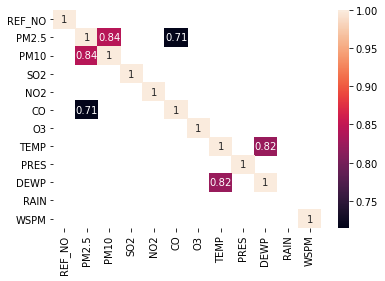

In [48]:
sb.heatmap(df_train.corr()[df_train.corr()>0.7],annot=True)

<AxesSubplot:>

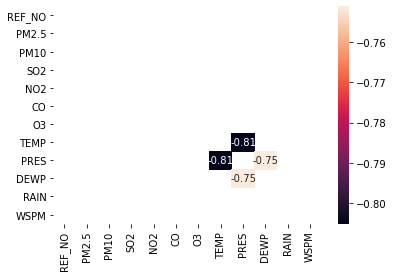

In [49]:
sb.heatmap(df_train.corr()[df_train.corr() < - 0.7],annot=True)

### SUGGEST TO REMOVE TEMP,DEWPT,CO,PM10 on basis of high correlation

### VIF:
    

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
df2 = df_train.select_dtypes(include = np.number)
df2.drop('REF_NO',axis=1,inplace = True)
df2.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0
5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,3.7
6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,2.5
7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,3.8


In [52]:
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(df2.values,i) for i in range(df2.shape[1])]

vif['Features'] = df2.columns

vif.sort_values(by = 'VIF',ascending = False)

,VIF,Features
6,18.873030,TEMP
7,17.719981,PRES
1,11.919684,PM10
0,11.834697,PM2.5
4,10.048429,CO
3,9.085993,NO2
8,6.934034,DEWP
10,5.977035,WSPM
5,5.549211,O3
2,3.320031,SO2


In [53]:
df2.drop('TEMP',axis=1,inplace=True)
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(df2.values,i) for i in range(df2.shape[1])]

vif['Features'] = df2.columns

vif.sort_values(by = 'VIF',ascending = False)


,VIF,Features
6,15.067618,PRES
1,11.661750,PM10
0,11.377118,PM2.5
4,9.601387,CO
3,8.917688,NO2
9,5.338926,WSPM
5,4.360372,O3
2,3.314309,SO2
7,1.845062,DEWP
8,NaN,RAIN


In [54]:
df2.drop('PRES',axis=1,inplace=True)
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(df2.values,i) for i in range(df2.shape[1])]

vif['Features'] = df2.columns

vif.sort_values(by = 'VIF',ascending = False)

,VIF,Features
1,11.630694,PM10
0,11.303688,PM2.5
4,8.543730,CO
3,6.304169,NO2
8,3.755790,WSPM
5,3.397946,O3
2,3.286193,SO2
6,1.844830,DEWP
7,NaN,RAIN


In [55]:
df2.drop('PM10',axis=1,inplace=True)
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(df2.values,i) for i in range(df2.shape[1])]

vif['Features'] = df2.columns

vif.sort_values(by = 'VIF',ascending = False)

,VIF,Features
3,8.482692,CO
0,5.718615,PM2.5
2,5.366883,NO2
7,3.754004,WSPM
4,3.305081,O3
1,3.271765,SO2
5,1.843895,DEWP
6,NaN,RAIN


In [56]:
df2.drop('CO',axis=1,inplace=True)
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(df2.values,i) for i in range(df2.shape[1])]

vif['Features'] = df2.columns

vif.sort_values(by = 'VIF',ascending = False)

,VIF,Features
2,4.278972,NO2
0,3.890282,PM2.5
6,3.695725,WSPM
3,3.298083,O3
1,3.094233,SO2
4,1.843393,DEWP
5,NaN,RAIN


In [57]:
col = vif.Features
col

0    PM2.5
1      SO2
2      NO2
3       O3
4     DEWP
5     RAIN
6     WSPM
Name: Features, dtype: object

#### WE SHALL TRY TO BUILD A MODEL WITH THE ABOVE FEATURES WITH AND WITHOUT CATEGORICAL COLUMNS.

In [58]:
X = df_train[['SO2','NO2','O3','WSPM','DEWP','RAIN']]

X.head()

,SO2,NO2,O3,WSPM,DEWP,RAIN
3,11.0,11.0,72.0,3.1,-19.4,0.0
4,12.0,12.0,72.0,2.0,-19.5,0.0
5,18.0,18.0,66.0,3.7,-19.6,0.0
6,18.0,32.0,50.0,2.5,-19.1,0.0
7,19.0,41.0,43.0,3.8,-19.1,0.0


In [59]:
X = sm.add_constant(X)

In [60]:
X.head()

,const,SO2,NO2,O3,WSPM,DEWP,RAIN
3,1.0,11.0,11.0,72.0,3.1,-19.4,0.0
4,1.0,12.0,12.0,72.0,2.0,-19.5,0.0
5,1.0,18.0,18.0,66.0,3.7,-19.6,0.0
6,1.0,18.0,32.0,50.0,2.5,-19.1,0.0
7,1.0,19.0,41.0,43.0,3.8,-19.1,0.0


In [61]:
#y = X['PM2.5']

X.drop('RAIN',inplace=True,axis=1)

In [62]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3,random_state = 111)

xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((205604, 6), (88116, 6), (205604,), (88116,))

#### MODEL 2: WITH VIF AND WITHOUT CATEG COLUMNS:

In [63]:
m2 = sm.OLS(ytrain,xtrain).fit()

m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PM2.5   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                 2.594e+04
Date:                Mon, 08 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:58:58   Log-Likelihood:            -1.0479e+06
No. Observations:              205604   AIC:                         2.096e+06
Df Residuals:                  205598   BIC:                         2.096e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0065      0.320     18.789      0.000       5.380       6.633
SO2            1.5113      0.010    144.039      0.000       1.491       1.532
NO2            0.7034      0.004    164.120      0.000       0.695       0.712
O3             0.0710      0.003     28.089      0.000       0.066       0.076
WSPM          -1.2922      0.112    -11.554      0.000      -1.511      -1.073
DEWP           1.2704      0.008    161.614      0.000       1.255       1.286
==============================================================================
Omnibus:                    43183.024   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91555.631
Skew:                           1.233   Prob(JB):                         0.00
Kurtosis:                       5.147   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
ypred1 = m2.predict(xtrain)
ypred2 = m2.predict(xtest)

rmse1 = round(np.sqrt(mean_squared_error(ytrain,ypred1)),2)

rmse2 = round(np.sqrt(mean_squared_error(ytest,ypred2)),2)

print("RMSE train: ",round(rmse1))
print("RMSE test: ",round(rmse2))

RMSE train:  40
RMSE test:  39


In [65]:
m2.pvalues[m2.pvalues >0.05]

Series([], dtype: float64)

In [66]:
score1 = pd.DataFrame({'Model Name':['LinReg_with_VIF_without categ'],'Alpha':['NIL'],
                      'L1_ratio':['NIL'],'R2':0.387,
                      'RMSE_TRAIN':rmse1,'RMSE_TEST':rmse2})
#score
results.append(score).append(score1)

,Model Name,Alpha,L1_ratio,R2,RMSE_TRAIN,RMSE_TEST
0,LinReg_without_VIF,NIL,NIL,0.814,21.79785,21.827985
0,LinReg_with_VIF_without categ,NIL,NIL,0.387,39.56000,39.450000


#### MODEL 2: WITH VIF AND WITH CATEG COLUMNS:

In [67]:
X = df_train[['SO2','NO2','O3','WSPM','DEWP','PM2.5']]



In [68]:
y = X['PM2.5']

X.drop('PM2.5',inplace=True,axis=1)



In [69]:
X = sm.add_constant(X)
X = pd.concat([X,df1_cat_encode],axis=1)
X.head()

,const,SO2,NO2,O3,WSPM,DEWP,year_2014,year_2015,year_2016,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW,station_Changping,station_Dingling,station_Dongsi,station_Guanyuan,station_Gucheng,station_Huairou,station_Nongzhanguan,station_Shunyi,station_Tiantan,station_Wanliu,station_Wanshouxigong
3,1.0,11.0,11.0,72.0,3.1,-19.4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,12.0,12.0,72.0,2.0,-19.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1.0,18.0,18.0,66.0,3.7,-19.6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1.0,18.0,32.0,50.0,2.5,-19.1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1.0,19.0,41.0,43.0,3.8,-19.1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3,random_state = 111)

xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((205604, 99), (88116, 99), (205604,), (88116,))

In [71]:
m3 = sm.OLS(ytrain,xtrain).fit()

m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PM2.5   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     2268.
Date:                Mon, 08 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:59:42   Log-Likelihood:            -1.0228e+06
No. Observations:              205604   AIC:                         2.046e+06
Df Residuals:                  205505   BIC:                         2.047e+06
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    45.2179      0.899     50.288      0.000      43.456      46.980
SO2                       1.0063      0.010     95.919      0.000       0.986       1.027
NO2                       0.7421      0.004    168.545      0.000       0.733       0.751
O3                        0.1871      0.003     66.664      0.000       0.182       0.193
WSPM                      1.3392      0.107     12.524      0.000       1.130       1.549
DEWP                      3.6837      0.015    247.086      0.000       3.654       3.713
year_2014                -0.3362      0.231     -1.454      0.146      -0.789       0.117
year_2015                 2.5189      0.235     10.707      0.000       2.058       2.980
year_2016                 3.4637      0.235     14.744      0.000       3.003       3.924
month_2                  -1.8963      0.488     -3.883      0.000      -2.853      -0.939
month_3                 -15.8617      0.459    -34.586      0.000     -16.761     -14.963
month_4                 -41.2687      0.512    -80.650      0.000     -42.272     -40.266
month_5                 -76.0044      0.571   -133.157      0.000     -77.123     -74.886
month_6                 -95.2328      0.668   -142.515      0.000     -96.543     -93.923
month_7                -101.4158      0.716   -141.621      0.000    -102.819    -100.012
month_8                -113.1462      0.704   -160.654      0.000    -114.527    -111.766
month_9                 -90.1668      0.638   -141.391      0.000     -91.417     -88.917
month_10                -51.4664      0.549    -93.766      0.000     -52.542     -50.391
month_11                -19.9649      0.478    -41.763      0.000     -20.902     -19.028
month_12                 -8.3699      0.453    -18.462      0.000      -9.258      -7.481
day_2                    -8.0388      0.603    -13.329      0.000      -9.221      -6.857
day_3                    -6.2956      0.606    -10.384      0.000      -7.484      -5.107
day_4                    -3.9020      0.609     -6.408      0.000      -5.096      -2.708
day_5                    -2.8970      0.611     -4.744      0.000      -4.094      -1.700
day_6                     2.1082      0.608      3.469      0.001       0.917       3.299
day_7                     0.9715      0.609      1.596      0.110      -0.221       2.164
day_8                    -2.0068      0.604     -3.323      0.001      -3.190      -0.823
day_9                    -4.7319      0.599     -7.904      0.000      -5.905      -3.559
day_10                   -5.6735      0.601     -9.446      0.000      -6.851      -4.496
day_11                   -6.9046      0.592    -11.657      0.000      -8.066      -5.744
day_12                   -9.1694      0.588    -15.585      0.000     -10.323      -8.016
day_13                 

In [72]:
ypred1 = m3.predict(xtrain)
ypred2 = m3.predict(xtest)

rmse1 = round(np.sqrt(mean_squared_error(ytrain,ypred1)),2)

rmse2 = round(np.sqrt(mean_squared_error(ytest,ypred2)),2)

print("RMSE train: ",rmse1)
print("RMSE test: ",rmse2)

RMSE train:  35.01
RMSE test:  34.88


In [73]:
score2 = pd.DataFrame({'Model Name':['LinReg_with_VIF_with_categ'],'Alpha':['NIL'],
                      'L1_ratio':['NIL'],'R2':0.52,
                      'RMSE_TRAIN':rmse1,'RMSE_TEST':rmse2})
#score
results.append(score).append(score1).append(score2)

,Model Name,Alpha,L1_ratio,R2,RMSE_TRAIN,RMSE_TEST
0,LinReg_without_VIF,NIL,NIL,0.814,21.79785,21.827985
0,LinReg_with_VIF_without categ,NIL,NIL,0.387,39.56000,39.450000
0,LinReg_with_VIF_with_categ,NIL,NIL,0.520,35.01000,34.880000


## RIDGE REGRESSION:

In [74]:
### RIDGE REGRESSION
ridge = Ridge()

m4 = ridge.fit(xtrain,ytrain)

r2 = m4.score(xtrain,ytrain)
print("R2: ",r2)

ypred1 = m4.predict(xtrain)
ypred2 = m4.predict(xtest)

rmse1 = round(np.sqrt(mean_squared_error(ytrain,ypred1)),2)

rmse2 = round(np.sqrt(mean_squared_error(ytest,ypred2)),2)

print("RMSE train: ",rmse1)
print("RMSE test: ",rmse2)



R2:  0.5196292511054439
RMSE train:  35.01
RMSE test:  34.88


In [75]:
score3 = pd.DataFrame({'Model Name':['Ridge'],'Alpha':[1],
                      'L1_ratio':['NIL'],'R2':r2,
                      'RMSE_TRAIN':rmse1,'RMSE_TEST':rmse2})
#score
results.append(score).append(score1).append(score2).append(score3)

,Model Name,Alpha,L1_ratio,R2,RMSE_TRAIN,RMSE_TEST
0,LinReg_without_VIF,NIL,NIL,0.814000,21.79785,21.827985
0,LinReg_with_VIF_without categ,NIL,NIL,0.387000,39.56000,39.450000
0,LinReg_with_VIF_with_categ,NIL,NIL,0.520000,35.01000,34.880000
0,Ridge,1,NIL,0.519629,35.01000,34.880000


In [78]:
### LASSO REGRESSION
lasso = Lasso()

m5 = ridge.fit(xtrain,ytrain)

r2 = m5.score(xtrain,ytrain)
print("R2: ",r2)

ypred1 = m5.predict(xtrain)
ypred2 = m5.predict(xtest)

rmse1 = round(np.sqrt(mean_squared_error(ytrain,ypred1)),2)

rmse2 = round(np.sqrt(mean_squared_error(ytest,ypred2)),2)

print("RMSE train: ",rmse1)
print("RMSE test: ",rmse2)

score4 = pd.DataFrame({'Model Name':['Lasso'],'Alpha':[1],
                      'L1_ratio':['NIL'],'R2':r2,
                      'RMSE_TRAIN':rmse1,'RMSE_TEST':rmse2})
#score

results = results.append(score).append(score1).append(score2).append(score3).append(score4)


R2:  0.5196292511054439
RMSE train:  35.01
RMSE test:  34.88


In [79]:
results

,Model Name,Alpha,L1_ratio,R2,RMSE_TRAIN,RMSE_TEST
0,LinReg_without_VIF,NIL,NIL,0.814000,21.79785,21.827985
0,LinReg_with_VIF_without categ,NIL,NIL,0.387000,39.56000,39.450000
0,LinReg_with_VIF_with_categ,NIL,NIL,0.520000,35.01000,34.880000
0,Ridge,1,NIL,0.519629,35.01000,34.880000
0,Lasso,1,NIL,0.519629,35.01000,34.880000


In [80]:
### ELASTIC NET:

enet = ElasticNet()
m6 = ridge.fit(xtrain,ytrain)

r2 = m6.score(xtrain,ytrain)
print("R2: ",r2)

ypred1 = m6.predict(xtrain)
ypred2 = m6.predict(xtest)

rmse1 = round(np.sqrt(mean_squared_error(ytrain,ypred1)),2)

rmse2 = round(np.sqrt(mean_squared_error(ytest,ypred2)),2)

print("RMSE train: ",rmse1)
print("RMSE test: ",rmse2)

score5 = pd.DataFrame({'Model Name':['Elastic_Net'],'Alpha':[1],
                      'L1_ratio':[0.5],'R2':r2,
                      'RMSE_TRAIN':rmse1,'RMSE_TEST':rmse2})
#score
results = results.append(score5)



R2:  0.5196292511054439
RMSE train:  35.01
RMSE test:  34.88


In [109]:
results

,Model Name,Alpha,L1_ratio,R2,RMSE_TRAIN,RMSE_TEST
0,LinReg_without_VIF,NIL,NIL,8.140000e-01,2.179785e+01,2.182798e+01
0,LinReg_with_VIF_without categ,NIL,NIL,3.870000e-01,3.956000e+01,3.945000e+01
0,LinReg_with_VIF_with_categ,NIL,NIL,5.200000e-01,3.501000e+01,3.488000e+01
0,Ridge,1,NIL,5.196293e-01,3.501000e+01,3.488000e+01
0,Lasso,1,NIL,5.196293e-01,3.501000e+01,3.488000e+01
0,Elastic_Net,1,0.5,5.196293e-01,3.501000e+01,3.488000e+01
0,SGD Regressor,0.0001,0.15,-1.565148e+15,1.998379e+09,1.992694e+09
0,SGD Regressor,0.0001,0.15,-8.998737e+11,4.791715e+07,4.782514e+07


In [111]:
results.index = [0,1,2,3,4,5,6,7]

In [112]:
results

,Model Name,Alpha,L1_ratio,R2,RMSE_TRAIN,RMSE_TEST
0,LinReg_without_VIF,NIL,NIL,8.140000e-01,2.179785e+01,2.182798e+01
1,LinReg_with_VIF_without categ,NIL,NIL,3.870000e-01,3.956000e+01,3.945000e+01
2,LinReg_with_VIF_with_categ,NIL,NIL,5.200000e-01,3.501000e+01,3.488000e+01
3,Ridge,1,NIL,5.196293e-01,3.501000e+01,3.488000e+01
4,Lasso,1,NIL,5.196293e-01,3.501000e+01,3.488000e+01
5,Elastic_Net,1,0.5,5.196293e-01,3.501000e+01,3.488000e+01
6,SGD Regressor,0.0001,0.15,-1.565148e+15,1.998379e+09,1.992694e+09
7,SGD Regressor,0.0001,0.15,-8.998737e+11,4.791715e+07,4.782514e+07


In [113]:
results.drop(index = [6,7],axis=0,inplace=True)

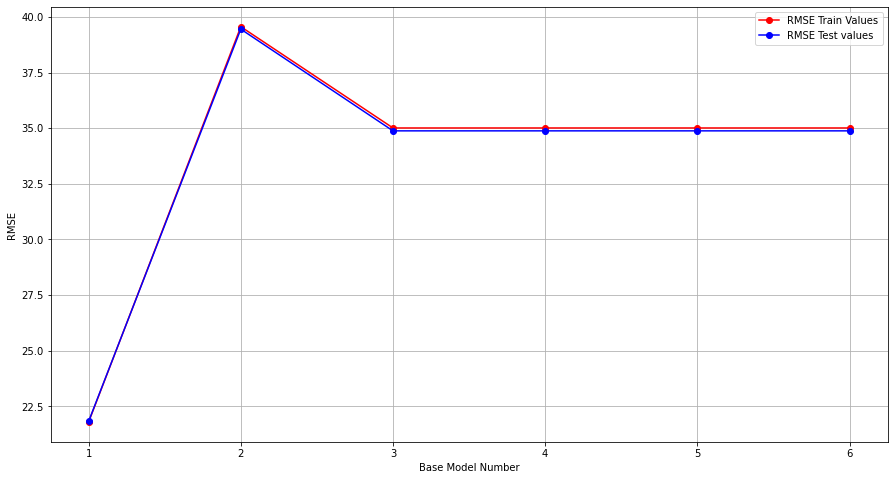

In [118]:
plt.figure(figsize = (15,8))
plt.plot(np.array([1,2,3,4,5,6]),results['RMSE_TRAIN'],'r-o',label = 'RMSE Train Values')
plt.plot(np.array([1,2,3,4,5,6]),results['RMSE_TEST'],'b-o',label = 'RMSE Test values')

plt.xlabel("Base Model Number")
plt.ylabel("RMSE")
plt.legend()
plt.grid()


#### So far, it can be noted that the model is in the underfit zone as RMSE is low (high bias) and difference between trian and test RMSE is very less.

In [119]:
#### HYPERTUNING ELASTIC NET MODEL:

params = {'alpha': [0.01,0.5,1],'l1_ratio':[0,0.1,0.5]}

grid1 = GridSearchCV(estimator= enet,param_grid= params)

m8 = grid1.fit(xtrain,ytrain)

In [120]:
m8.best_params_

{'alpha': 0.01, 'l1_ratio': 0.5}

In [122]:
m8 = ElasticNet(alpha= 0.01,l1_ratio= 0)

m8 = m8.fit(xtrain,ytrain)
r2 = m8.score(xtrain,ytrain)

ypred1 = m8.predict(xtrain)
ypred2 = m8.predict(xtest)

rmse1 = round(np.sqrt(mean_squared_error(ytrain,ypred1)),2)

rmse2 = round(np.sqrt(mean_squared_error(ytest,ypred2)),2)

print("RMSE train: ",rmse1)
print("RMSE test: ",rmse2)

score7 = pd.DataFrame({'Model Name':['ENet_GridSearch'],'Alpha':[.01],
                      'L1_ratio':[0],'R2':r2,
                      'RMSE_TRAIN':rmse1,'RMSE_TEST':rmse2})
#score
results = results.append(score7)




RMSE train:  36.17
RMSE test:  36.03


In [124]:
results.index = [0,1,2,3,4,5,6]

In [125]:
results

,Model Name,Alpha,L1_ratio,R2,RMSE_TRAIN,RMSE_TEST
0,LinReg_without_VIF,NIL,NIL,0.814000,21.79785,21.827985
1,LinReg_with_VIF_without categ,NIL,NIL,0.387000,39.56000,39.450000
2,LinReg_with_VIF_with_categ,NIL,NIL,0.520000,35.01000,34.880000
3,Ridge,1,NIL,0.519629,35.01000,34.880000
4,Lasso,1,NIL,0.519629,35.01000,34.880000
5,Elastic_Net,1,0.5,0.519629,35.01000,34.880000
6,ENet_GridSearch,0.01,0,0.487257,36.17000,36.030000


#### TRANSFORMING TARGET VARIABLE:

In [126]:
X = df_train[['SO2','NO2','O3','WSPM','DEWP','PM2.5']]

y = X['PM2.5']

In [127]:
X.skew()

SO2      1.512136
NO2      0.688403
O3       0.878186
WSPM     0.730435
DEWP    -0.356371
PM2.5    1.187056
dtype: float64

In [128]:
y.skew()

1.1870557382806683

In [129]:
y1 = y.copy()

y1 = np.log(y1)

y1.skew()

-0.49318465318592675

In [130]:
y = np.log(X['PM2.5'])
y.skew()

-0.49318465318592675

In [131]:
X.drop('PM2.5',inplace=True,axis=1)

In [132]:
X = pd.concat([X,df1_cat_encode],axis=1)

In [133]:
X = sm.add_constant(X)
X.head()

,const,SO2,NO2,O3,WSPM,DEWP,year_2014,year_2015,year_2016,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW,station_Changping,station_Dingling,station_Dongsi,station_Guanyuan,station_Gucheng,station_Huairou,station_Nongzhanguan,station_Shunyi,station_Tiantan,station_Wanliu,station_Wanshouxigong
3,1.0,11.0,11.0,72.0,3.1,-19.4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,12.0,12.0,72.0,2.0,-19.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1.0,18.0,18.0,66.0,3.7,-19.6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1.0,18.0,32.0,50.0,2.5,-19.1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1.0,19.0,41.0,43.0,3.8,-19.1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [134]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3,random_state = 111)

xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((205604, 99), (88116, 99), (205604,), (88116,))

In [136]:
m9 = ElasticNet(alpha= 0.01,l1_ratio= 0)

m9 = m9.fit(xtrain,ytrain)
r2 = m9.score(xtrain,ytrain)

ypred1 = m9.predict(xtrain)
ypred2 = m9.predict(xtest)

rmse1 = np.sqrt(mean_squared_error(ytrain,ypred1))

rmse2 = np.sqrt(mean_squared_error(ytest,ypred2))

print("RMSE train: ",rmse1)
print("RMSE test: ",rmse2)

score8 = pd.DataFrame({'Model Name':['ENet_GridSearch_transf-y'],'Alpha':[.01],
                      'L1_ratio':[0],'R2':r2,
                      'RMSE_TRAIN':rmse1,'RMSE_TEST':rmse2})
#score
results = results.append(score8)
results.index = [0,1,2,3,4,5,6,7]
results

RMSE train:  0.6577567107690843
RMSE test:  0.6564855021479957


,Model Name,Alpha,L1_ratio,R2,RMSE_TRAIN,RMSE_TEST
0,LinReg_without_VIF,NIL,NIL,0.814000,21.797850,21.827985
1,LinReg_with_VIF_without categ,NIL,NIL,0.387000,39.560000,39.450000
2,LinReg_with_VIF_with_categ,NIL,NIL,0.520000,35.010000,34.880000
3,Ridge,1,NIL,0.519629,35.010000,34.880000
4,Lasso,1,NIL,0.519629,35.010000,34.880000
5,Elastic_Net,1,0.5,0.519629,35.010000,34.880000
6,ENet_GridSearch,0.01,0,0.487257,36.170000,36.030000
7,ENet_GridSearch_transf-y,0.01,0,0.585290,0.657757,0.656486


#### TRANSFORMING SKEW OF PREDICTORS:

In [137]:
X = df_train[['SO2','NO2','O3','WSPM','DEWP','PM2.5']]

y = X['PM2.5']

X.skew()

SO2      1.512136
NO2      0.688403
O3       0.878186
WSPM     0.730435
DEWP    -0.356371
PM2.5    1.187056
dtype: float64

In [139]:
from scipy.stats import boxcox

In [140]:
### TRANSFORMING SO2 VARIABLE:

X['SO2'] = boxcox(X['SO2'],lmbda = -0.2)

X['SO2'].skew()

0.0030195633088023043

In [141]:
X.head()


,SO2,NO2,O3,WSPM,DEWP,PM2.5
3,1.904780,11.0,72.0,3.1,-19.4,6.0
4,1.958178,12.0,72.0,2.0,-19.5,3.0
5,2.195112,18.0,66.0,3.7,-19.6,5.0
6,2.195112,32.0,50.0,2.5,-19.1,3.0
7,2.225279,41.0,43.0,3.8,-19.1,3.0


In [142]:
y = X['PM2.5']

X.drop('PM2.5',axis=1,inplace=True)

In [143]:
X = pd.concat([X,df1_cat_encode],axis=1)
X.head()

,SO2,NO2,O3,WSPM,DEWP,year_2014,year_2015,year_2016,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW,station_Changping,station_Dingling,station_Dongsi,station_Guanyuan,station_Gucheng,station_Huairou,station_Nongzhanguan,station_Shunyi,station_Tiantan,station_Wanliu,station_Wanshouxigong
3,1.904780,11.0,72.0,3.1,-19.4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.958178,12.0,72.0,2.0,-19.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2.195112,18.0,66.0,3.7,-19.6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2.195112,32.0,50.0,2.5,-19.1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2.225279,41.0,43.0,3.8,-19.1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [144]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3,random_state = 111)

#xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

m10 = ElasticNet(alpha= 0.01,l1_ratio= 0)

m10 = m10.fit(xtrain,ytrain)
r2 = m10.score(xtrain,ytrain)

ypred1 = m10.predict(xtrain)
ypred2 = m10.predict(xtest)

rmse1 = np.sqrt(mean_squared_error(ytrain,ypred1))

rmse2 = np.sqrt(mean_squared_error(ytest,ypred2))

print("RMSE train: ",rmse1)
print("RMSE test: ",rmse2)

score9 = pd.DataFrame({'Model Name':['ENet_GridSearch_transformedall'],'Alpha':[.01],
                      'L1_ratio':[0],'R2':r2,
                      'RMSE_TRAIN':rmse1,'RMSE_TEST':rmse2})
#score
results = results.append(score9)
results.index = [0,1,2,3,4,5,6,7,8]
results

RMSE train:  36.390854433916495
RMSE test:  36.25751419668579


,Model Name,Alpha,L1_ratio,R2,RMSE_TRAIN,RMSE_TEST
0,LinReg_without_VIF,NIL,NIL,0.814000,21.797850,21.827985
1,LinReg_with_VIF_without categ,NIL,NIL,0.387000,39.560000,39.450000
2,LinReg_with_VIF_with_categ,NIL,NIL,0.520000,35.010000,34.880000
3,Ridge,1,NIL,0.519629,35.010000,34.880000
4,Lasso,1,NIL,0.519629,35.010000,34.880000
5,Elastic_Net,1,0.5,0.519629,35.010000,34.880000
6,ENet_GridSearch,0.01,0,0.487257,36.170000,36.030000
7,ENet_GridSearch_transf-y,0.01,0,0.585290,0.657757,0.656486
8,ENet_GridSearch_transformedall,0.01,0,0.480980,36.390854,36.257514


In [145]:
#### MODEL WITHOUT YEAR:
X = df_train[['SO2','NO2','O3','WSPM','DEWP','PM2.5']]
X['PM2.5'] = np.log(X['PM2.5'])

df1_cat_encode1 = df1_cat_encode.drop(['year_2014','year_2015','year_2016'],axis=1)

In [146]:
y = X['PM2.5']
X.drop('PM2.5',axis=1,inplace=True)
X = sm.add_constant(X)
X = pd.concat([X,df1_cat_encode1],axis=1)
X.head()

,const,SO2,NO2,O3,WSPM,DEWP,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW,station_Changping,station_Dingling,station_Dongsi,station_Guanyuan,station_Gucheng,station_Huairou,station_Nongzhanguan,station_Shunyi,station_Tiantan,station_Wanliu,station_Wanshouxigong
3,1.0,11.0,11.0,72.0,3.1,-19.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,12.0,12.0,72.0,2.0,-19.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1.0,18.0,18.0,66.0,3.7,-19.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1.0,18.0,32.0,50.0,2.5,-19.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1.0,19.0,41.0,43.0,3.8,-19.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [147]:
y.head()

3    1.791759
4    1.098612
5    1.609438
6    1.098612
7    1.098612
Name: PM2.5, dtype: float64

In [149]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3,random_state = 111)

#xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

m11 = ElasticNet(alpha= 0.01,l1_ratio= 0)

m11 = m11.fit(xtrain,ytrain)
r2 = m11.score(xtrain,ytrain)

ypred1 = m11.predict(xtrain)
ypred2 = m11.predict(xtest)

rmse1 = round(np.sqrt(mean_squared_error(ytrain,ypred1)),2)

rmse2 = round(np.sqrt(mean_squared_error(ytest,ypred2)),2)

print("RMSE train: ",rmse1)
print("RMSE test: ",rmse2)

score10 = pd.DataFrame({'Model Name':['ENet_GS_withoutyear'],'Alpha':[.01],
                      'L1_ratio':[0],'R2':r2,
                      'RMSE_TRAIN':rmse1,'RMSE_TEST':rmse2})
#score
results = results.append(score10)
results.index = [0,1,2,3,4,5,6,7,8,9]
results

RMSE train:  0.66
RMSE test:  0.66


,Model Name,Alpha,L1_ratio,R2,RMSE_TRAIN,RMSE_TEST
0,LinReg_without_VIF,NIL,NIL,0.814000,21.797850,21.827985
1,LinReg_with_VIF_without categ,NIL,NIL,0.387000,39.560000,39.450000
2,LinReg_with_VIF_with_categ,NIL,NIL,0.520000,35.010000,34.880000
3,Ridge,1,NIL,0.519629,35.010000,34.880000
4,Lasso,1,NIL,0.519629,35.010000,34.880000
5,Elastic_Net,1,0.5,0.519629,35.010000,34.880000
6,ENet_GridSearch,0.01,0,0.487257,36.170000,36.030000
7,ENet_GridSearch_transf-y,0.01,0,0.585290,0.657757,0.656486
8,ENet_GridSearch_transformedall,0.01,0,0.480980,36.390854,36.257514
9,ENet_GS_withoutyear,0.01,0,0.578986,0.660000,0.660000


In [152]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [176]:
df_train.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
5,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin
6,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin
7,8,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin


In [177]:
X = df_train[['SO2','NO2','CO','PM10','O3','WSPM','DEWP','PM2.5','RAIN','TEMP','PRES']]

col = X.columns
X[col] = StandardScaler().fit_transform(X[col])
X.head()

,SO2,NO2,CO,PM10,O3,WSPM,DEWP,PM2.5,RAIN,TEMP,PRES
3,0.116133,-1.252594,-1.064387,-1.270813,0.414006,1.694519,-1.708398,-1.057997,0.0,-1.503618,1.407497
4,0.217671,-1.215977,-1.064387,-1.321090,0.414006,0.496727,-1.715722,-1.117378,0.0,-1.558892,1.475199
5,0.826897,-0.996276,-0.892120,-1.287572,0.279480,2.347859,-1.723046,-1.077790,0.0,-1.577316,1.513885
6,0.826897,-0.483639,-0.719852,-1.321090,-0.079255,1.041178,-1.686427,-1.117378,0.0,-1.614165,1.600930
7,0.928435,-0.154087,-0.719852,-1.270813,-0.236202,2.456750,-1.686427,-1.117378,0.0,-1.522043,1.687974


In [178]:
y = X['PM2.5']
X.drop('PM2.5',inplace=True,axis=1)
X = pd.concat([X,df1_cat_encode],axis=1)
X.head()

,SO2,NO2,CO,PM10,O3,WSPM,DEWP,RAIN,TEMP,PRES,year_2014,year_2015,year_2016,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW,station_Changping,station_Dingling,station_Dongsi,station_Guanyuan,station_Gucheng,station_Huairou,station_Nongzhanguan,station_Shunyi,station_Tiantan,station_Wanliu,station_Wanshouxigong
3,0.116133,-1.252594,-1.064387,-1.270813,0.414006,1.694519,-1.708398,0.0,-1.503618,1.407497,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.217671,-1.215977,-1.064387,-1.321090,0.414006,0.496727,-1.715722,0.0,-1.558892,1.475199,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.826897,-0.996276,-0.892120,-1.287572,0.279480,2.347859,-1.723046,0.0,-1.577316,1.513885,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0.826897,-0.483639,-0.719852,-1.321090,-0.079255,1.041178,-1.686427,0.0,-1.614165,1.600930,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0.928435,-0.154087,-0.719852,-1.270813,-0.236202,2.456750,-1.686427,0.0,-1.522043,1.687974,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [179]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((205604, 103), (88116, 103), (205604,), (88116,))

In [180]:
knn = KNeighborsRegressor()

knn_model = knn.fit(xtrain,ytrain)

In [ ]:
r2 = knn_model.score(xtrain,ytrain)

ypred1 = knn_model.predict(xtrain)
ypred2 = knn_model.predict(xtest)

rmse1 = np.sqrt(mean_squared_error(ytrain,ypred1))

rmse2 = np.sqrt(mean_squared_error(ytest,ypred2))

print("RMSE train: ",rmse1)
print("RMSE test: ",rmse2)

score11 = pd.DataFrame({'Model Name':['KNN_regressor'],'Alpha':[.01],
                      'L1_ratio':[0],'R2':r2,
                      'RMSE_TRAIN':rmse1,'RMSE_TEST':rmse2})


In [160]:
results

,Model Name,Alpha,L1_ratio,R2,RMSE_TRAIN,RMSE_TEST
0,LinReg_without_VIF,NIL,NIL,0.814000,21.797850,21.827985
1,LinReg_with_VIF_without categ,NIL,NIL,0.387000,39.560000,39.450000
2,LinReg_with_VIF_with_categ,NIL,NIL,0.520000,35.010000,34.880000
3,Ridge,1,NIL,0.519629,35.010000,34.880000
4,Lasso,1,NIL,0.519629,35.010000,34.880000
5,Elastic_Net,1,0.5,0.519629,35.010000,34.880000
6,ENet_GridSearch,0.01,0,0.487257,36.170000,36.030000
7,ENet_GridSearch_transf-y,0.01,0,0.585290,0.657757,0.656486
8,ENet_GridSearch_transformedall,0.01,0,0.480980,36.390854,36.257514
9,ENet_GS_withoutyear,0.01,0,0.578986,0.660000,0.660000


In [ ]:
X = df_train[['SO2','NO2','CO','PM10','O3','WSPM','DEWP','RAIN','TEMP','PRES']]
X = pd.concat([X,df1_cat_encode],axis=1)
y = df_train['PM2.5']
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

In [161]:
dt = DecisionTreeRegressor()
dt_model = dt.fit(xtrain,ytrain)
r2 = dt_model.score(xtrain,ytrain)

ypred1 = dt_model.predict(xtrain)
ypred2 = dt_model.predict(xtest)

rmse1 = np.sqrt(mean_squared_error(ytrain,ypred1))

rmse2 = np.sqrt(mean_squared_error(ytest,ypred2))

print("RMSE train: ",rmse1)
print("RMSE test: ",rmse2)

score12 = pd.DataFrame({'Model Name':['DT'],'Alpha':[.01],
                      'L1_ratio':[0],'R2':r2,
                      'RMSE_TRAIN':rmse1,'RMSE_TEST':rmse2})
#score
results = results.append(score12)
results.index = [0,1,2,3,4,5,6,7,8,9,10,11]
results

RMSE train:  0.0
RMSE test:  29.13886034826916


,Model Name,Alpha,L1_ratio,R2,RMSE_TRAIN,RMSE_TEST
0,LinReg_without_VIF,NIL,NIL,0.814000,21.797850,21.827985
1,LinReg_with_VIF_without categ,NIL,NIL,0.387000,39.560000,39.450000
2,LinReg_with_VIF_with_categ,NIL,NIL,0.520000,35.010000,34.880000
3,Ridge,1,NIL,0.519629,35.010000,34.880000
4,Lasso,1,NIL,0.519629,35.010000,34.880000
5,Elastic_Net,1,0.5,0.519629,35.010000,34.880000
6,ENet_GridSearch,0.01,0,0.487257,36.170000,36.030000
7,ENet_GridSearch_transf-y,0.01,0,0.585290,0.657757,0.656486
8,ENet_GridSearch_transformedall,0.01,0,0.480980,36.390854,36.257514
9,ENet_GS_withoutyear,0.01,0,0.578986,0.660000,0.660000


In [ ]:
### rf = RandomForestRegressor()
rf_model = rf.fit(xtrain,ytrain)
r2 = rf_model.score(xtrain,ytrain)

ypred1 = rf_model.predict(xtrain)
ypred2 = rf_model.predict(xtest)

rmse1 = np.sqrt(mean_squared_error(ytrain,ypred1))

rmse2 = np.sqrt(mean_squared_error(ytest,ypred2))

print("RMSE train: ",rmse1)
print("RMSE test: ",rmse2)

score13 = pd.DataFrame({'Model Name':['RF'],'Alpha':['-'],
                      'L1_ratio':['-'],'R2':r2,
                      'RMSE_TRAIN':rmse1,'RMSE_TEST':rmse2})
#score
results = results.append(score13)
results.index = [0,1,2,3,4,5,6,7,8,9,10,11,12]
results

In [170]:
results

,Model Name,Alpha,L1_ratio,R2,RMSE_TRAIN,RMSE_TEST
0,LinReg_without_VIF,NIL,NIL,0.814000,21.797850,21.827985
1,LinReg_with_VIF_without categ,NIL,NIL,0.387000,39.560000,39.450000
2,LinReg_with_VIF_with_categ,NIL,NIL,0.520000,35.010000,34.880000
3,Ridge,1,NIL,0.519629,35.010000,34.880000
4,Lasso,1,NIL,0.519629,35.010000,34.880000
5,Elastic_Net,1,0.5,0.519629,35.010000,34.880000
6,ENet_GridSearch,0.01,0,0.487257,36.170000,36.030000
7,ENet_GridSearch_transf-y,0.01,0,0.585290,0.657757,0.656486
8,ENet_GridSearch_transformedall,0.01,0,0.480980,36.390854,36.257514
9,ENet_GS_withoutyear,0.01,0,0.578986,0.660000,0.660000


In [171]:
from sklearn.ensemble import GradientBoostingRegressor

In [173]:
gb = GradientBoostingRegressor()

gb_model = gb.fit(xtrain,ytrain)
r2 = gb_model.score(xtrain,ytrain)

ypred1 = gb_model.predict(xtrain)
ypred2 = gb_model.predict(xtest)

rmse1 = np.sqrt(mean_squared_error(ytrain,ypred1))

rmse2 = np.sqrt(mean_squared_error(ytest,ypred2))

print("RMSE train: ",rmse1)
print("RMSE test: ",rmse2)

score14 = pd.DataFrame({'Model Name':['GB'],'Alpha':['-'],
                      'L1_ratio':['-'],'R2':r2,
                      'RMSE_TRAIN':rmse1,'RMSE_TEST':rmse2})
#score
results = results.append(score13)
results.index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
results

RMSE train:  32.85510773986312
RMSE test:  32.83415843306275


,Model Name,Alpha,L1_ratio,R2,RMSE_TRAIN,RMSE_TEST
0,LinReg_without_VIF,NIL,NIL,0.814000,21.797850,21.827985
1,LinReg_with_VIF_without categ,NIL,NIL,0.387000,39.560000,39.450000
2,LinReg_with_VIF_with_categ,NIL,NIL,0.520000,35.010000,34.880000
3,Ridge,1,NIL,0.519629,35.010000,34.880000
4,Lasso,1,NIL,0.519629,35.010000,34.880000
5,Elastic_Net,1,0.5,0.519629,35.010000,34.880000
6,ENet_GridSearch,0.01,0,0.487257,36.170000,36.030000
7,ENet_GridSearch_transf-y,0.01,0,0.585290,0.657757,0.656486
8,ENet_GridSearch_transformedall,0.01,0,0.480980,36.390854,36.257514
9,ENet_GS_withoutyear,0.01,0,0.578986,0.660000,0.660000


In [174]:
results.iloc[13,0] = 'GB'

In [175]:
results

,Model Name,Alpha,L1_ratio,R2,RMSE_TRAIN,RMSE_TEST
0,LinReg_without_VIF,NIL,NIL,0.814000,21.797850,21.827985
1,LinReg_with_VIF_without categ,NIL,NIL,0.387000,39.560000,39.450000
2,LinReg_with_VIF_with_categ,NIL,NIL,0.520000,35.010000,34.880000
3,Ridge,1,NIL,0.519629,35.010000,34.880000
4,Lasso,1,NIL,0.519629,35.010000,34.880000
5,Elastic_Net,1,0.5,0.519629,35.010000,34.880000
6,ENet_GridSearch,0.01,0,0.487257,36.170000,36.030000
7,ENet_GridSearch_transf-y,0.01,0,0.585290,0.657757,0.656486
8,ENet_GridSearch_transformedall,0.01,0,0.480980,36.390854,36.257514
9,ENet_GS_withoutyear,0.01,0,0.578986,0.660000,0.660000
